In [9]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

In [10]:
# любые числа ставим
a1 = np.array([3, 1])
a2 = np.array([2, 1, 1])

In [11]:
def Calc_C(a, b):
  return np.array([a[0] * b[0], 
          a[1] * b[0],
          a[0] * b[1], 
          a[1] * b[1],
          a[0] * b[2], 
          a[1] * b[2]])

In [12]:
c0 = Calc_C(a1, a2)
print(c0)

[6 2 3 1 3 1]


In [13]:
# любые числа ставим
F1 = np.matrix([
               [2,   1],
               [-1, -3]
               ])
F2 = np.matrix([[ 0,  1,  0],
                [-1,  0,  0],
                [ 0,  0,  1]])

#используем такую формулу чтобы у нас матрица была одинаковой с сопряженной с ней
F12 = (  np.tensordot(F1, F2.getH(), 0)) + (  np.tensordot(F1.getH(),F2, 0))
#F12 =   np.tensordot(F1, F2, 0) 

# костыль чтобы правильно склеить все матрицы в одну квадратную
F_1 = np.concatenate((F12[0][0], F12[0][1]))
F_2 = np.concatenate((F12[1][0], F12[1][1]))
F12 = np.column_stack((F_1, F_2))

print(F12)
print()
print(np.matrix(F12).getH())

[[ 0  0  0  0  2  0]
 [ 0  0  0 -2  0  0]
 [ 0  0  4  0  0  0]
 [ 0 -2  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  0 -6]]

[[ 0  0  0  0  2  0]
 [ 0  0  0 -2  0  0]
 [ 0  0  4  0  0  0]
 [ 0 -2  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  0 -6]]


In [14]:
U = linalg.expm(2j * F12)

In [15]:
x = []
y = []
n0 = c0
for i in range(50):
  n0 = U.dot(n0)
  #print(n0)

  d1 = n0[0] * n0[4] - n0[3] * n0[1]
  d2 = n0[1] * n0[5] - n0[2] * n0[4]
  d3 = n0[0] * n0[3] - n0[2] * n0[5]

  #print(d1, d2, d3)
  
  d = np.min(np.array([np.abs(d1),np.abs(d2),np.abs(d3)]))
  
  if(np.abs(d1) == d):
    y.append(d1)
  elif(np.abs(d2) == d):
    y.append(d2)
  elif(np.abs(d3) == d):
    y.append(d3)


  x.append(i)
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


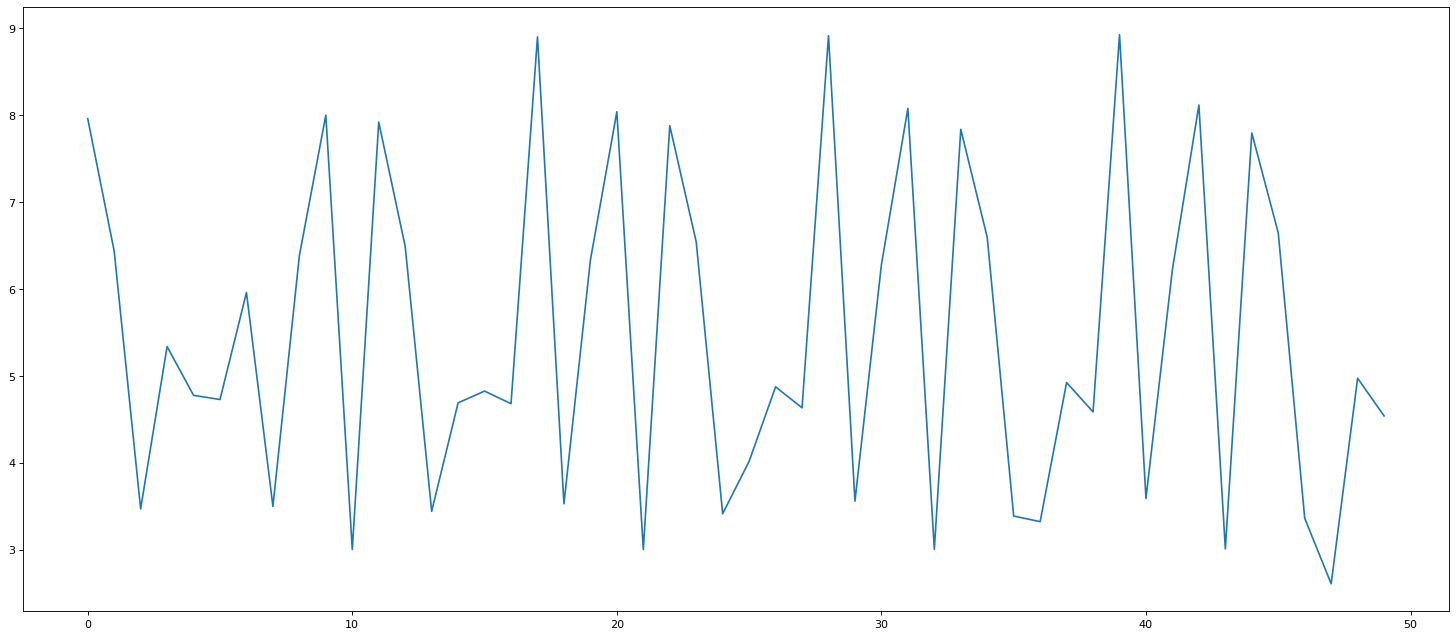

In [16]:
plt.figure(figsize=(23, 10), dpi=80)
plt.plot(x,y)